# Lesson 12 activity: linear algebra & basic statistics

## Learning objectives

This activity will help you to:

1. Apply concepts from linear algebra to gain meaningful insight from data
2. Understand statistical data types
3. Use measures of shape to describe distributions
4. Apply covariance and correlation to describe relationships between variables

## Setup

Import the required libraries and load the weather dataset.

In [392]:
import pandas as pd
import numpy as np

In [393]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: linear algebra - finding similar days

**Objective**: Apply concepts from linear algebra to gain meaningful insight from data.

In linear algebra, we can treat each row of data as a vector and measure how similar different vectors are. This is useful for finding patterns - for example, finding days with similar weather conditions.

**Tasks**:

1. Select only the numeric columns from the dataset: `temperature_c`, `rainfall_inches`, `humidity_percent`, and `pressure_hpa`

2. Extract the **first row** (day 0) as a reference vector

3. For each row in the dataset, calculate the **cosine similarity** to the first row using:
   $$\text{similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$
   - You can use `np.dot()` for the dot product
   - You can use `np.linalg.norm()` to calculate vector magnitudes
   
4. Add the similarity scores as a new column to the dataframe

5. **Sort** the dataframe by similarity (highest to lowest) so the most similar days to day 0 appear first

6. Display the **top 10 most similar days** including their similarity scores and weather conditions

7. **Interpret**: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?

In [394]:
# Your code here
a = df[["temperature_c","rainfall_inches","humidity_percent","pressure_hpa"]]
a.head()

,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,8.2,0.13,48.8,1016.5
1,1.6,0.29,89.6,1009.4
2,7.3,0.01,100.0,1003.3
3,21.6,0.62,49.3,1006.9
4,12.0,1.09,38.6,1016.0


In [395]:
b = a.iloc[0]
print(b)

temperature_c          8.20
rainfall_inches        0.13
humidity_percent      48.80
pressure_hpa        1016.50
Name: 0, dtype: float64


In [396]:
def similarity(a):
    global b
    return np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [397]:

for index,row in a.iterrows():
    df.at[index,"similarity"] = similarity(row)

df.sort_values(by="similarity",ascending=False,inplace=True)
df.to_csv("similarity.csv")
print(df)

    weather_condition  wind_strength  temperature_c  rainfall_inches  \
0               Sunny   Light Breeze            8.2             0.13   
41             Cloudy   Light Breeze            8.0             0.01   
319             Sunny    Strong Wind            6.8             0.38   
26              Sunny   Light Breeze            6.5             0.32   
100             Sunny   Light Breeze            6.6             0.25   
..                ...            ...            ...              ...   
270             Rainy   Light Breeze            1.6             0.03   
107             Rainy           Calm            5.9             0.37   
126             Rainy  Moderate Wind           -4.8             0.03   
191             Rainy           Calm           -6.3             0.09   
217             Rainy   Light Breeze           -7.6             0.61   

     humidity_percent  pressure_hpa  similarity  
0                48.8        1016.5    1.000000  
41               50.1        1011.5

## Exercise 2: data types and visualization

**Objective**: Understand statistical data types and visualize interactions between variables.

Understanding data types is crucial for choosing appropriate statistical methods and visualizations. In this exercise, you'll identify data types and explore how numeric variables interact with categorical ones.

**Tasks**:

1. **Identify data types**: For `humidity_percent` and `pressure_hpa`, determine what type of data they are:
   - Are they **interval** data (no true zero) or **ratio** data (has true zero)?
   - For each variable, explain your reasoning:
     - Does zero mean "none" or "absence of the quantity"?
     - Are ratios meaningful? (e.g., is 100% humidity "twice" 50% humidity?)
     - Can the value go below zero?

2. **Create visualizations**: Choose an appropriate plot type to show how `humidity_percent` and `pressure_hpa` vary across different `weather_condition` categories
   - Consider options like: box plots, violin plots, bar plots with error bars, or scatter plots with color coding
   - Create **one plot** that effectively shows the relationship between both numeric variables and the weather condition
   - You might use a single plot with subplots, or find a creative way to show all three variables together

3. **Interpret your visualization**:
   - Which weather condition tends to have the highest humidity?
   - Which weather condition tends to have the lowest pressure?
   - Do you see clear differences between weather conditions?
   - Does this pattern make sense from a meteorological perspective?

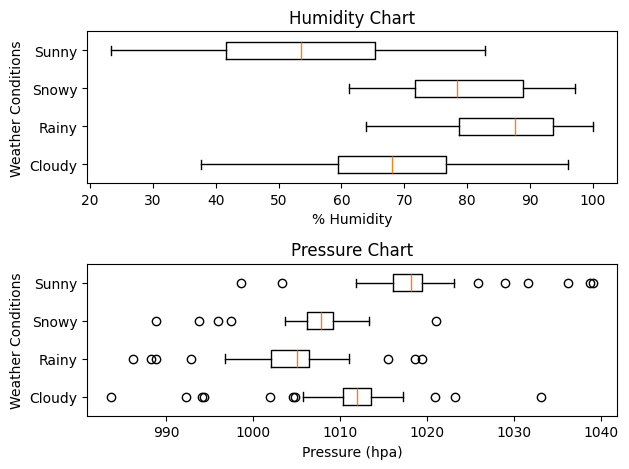

In [398]:
# Your code here
import matplotlib.pyplot as plt
# Sample data

keys = df["weather_condition"].unique()
humidity_data = df.groupby("weather_condition")["humidity_percent"]
pressure_data = df.groupby("weather_condition")["pressure_hpa"]
humid_values = []
press_values = []
temp_keys = []

for key,value in humidity_data:
    temp_keys.append(key)
    humid_values.append(value)
    

for key,value in pressure_data:
    press_values.append(value)

fig, axes = plt.subplots(2)

axes[0].boxplot(humid_values,tick_labels=temp_keys,orientation="horizontal")
axes[0].set_xlabel("% Humidity")
axes[0].set_ylabel("Weather Conditions")
axes[0].set_title("Humidity Chart")

axes[1].boxplot(press_values,tick_labels=temp_keys,orientation="horizontal")
axes[1].set_xlabel("Pressure (hpa)")
axes[1].set_ylabel("Weather Conditions")
axes[1].set_title("Pressure Chart")

plt.tight_layout()
plt.show()

#plt.boxplot(temp_value,orientation="horizontal")
plt.show()
#print(temp_values)

## Exercise 3: analyzing distribution skewness

**Objective**: Use measures of shape to describe distributions.

Skewness describes the asymmetry of a distribution. Understanding skewness helps you choose appropriate statistical methods and understand the nature of your data.

**Tasks**:

1. Calculate the **skewness** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify which variable has:
   - The **greatest skew** (furthest from zero)
   - The **least skew** (closest to zero, most symmetric)
   - Print these findings with their skewness values

3. Create **two histograms** (side by side) showing only these two variables:
   - One histogram for the most skewed variable
   - One histogram for the least skewed variable
   - For each histogram:
     - Add vertical lines showing the mean (in red) and median (in green)
     - Include the skewness value in the title
     - Use appropriate bin sizes

4. **Interpret** your findings:
   - Why does the most skewed variable have the sign that it does? (Think about the real-world meaning)
   - For the skewed distribution, how do the mean and median compare? Why?
   - What does the skewness tell you about typical vs extreme values for this variable?
   - Why is the least skewed variable more symmetric?
   - **Bonus**: Explain why skewness matters when choosing between mean and median as a measure of central tendency.

In [400]:
# Your code here

## Exercise 4: exploring relationships with correlation

**Objective**: Apply covariance and correlation to describe relationships between variables.

Weather variables often have meaningful relationships. Some pairs of variables are strongly related while others have little relationship at all.

**Tasks**:

1. Calculate the **correlation matrix** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify the pair of variables with:
   - The **strongest correlation** (highest absolute value, whether positive or negative)
   - The **weakest correlation** (closest to zero)
   - Print both pairs with their correlation coefficients
   - Note whether the strongest correlation is positive or negative

3. Create **two scatter plots** (side by side or in separate figures):
   - One for the strongest correlation pair
   - One for the weakest correlation pair
   - For each plot:
     - Include the correlation coefficient in the title
     - Add appropriate axis labels

4. **Interpret** your findings:
   - What is the strongest relationship? Does it make meteorological sense?
   - Is this strongest correlation positive or negative? What does that mean in real-world terms?
   - What is the weakest relationship? Why might these variables have little correlation?
   - Compare the scatter plots: How does the pattern differ between strong and weak correlations?
   - Based on the correlation strengths, which relationship is more predictable?

In [401]:
# Your code here